In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:

from sklearn import neighbors, datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import os
from sklearn.utils.multiclass import unique_labels

n_neighbors = 200

Check working directory, probably in knearest folder. Change to cwd to src to acces the data easily

In [3]:
os.getcwd()

'C:\\Users\\niels\\gitlab\\seminar\\src\\knearest'

Move up one directory

In [4]:
%cd ..

C:\Users\niels\gitlab\seminar\src


Load the data into numpy arrays

In [5]:

img = np.genfromtxt('data\images.csv', delimiter=',')
test = np.genfromtxt('data\images_test.csv', delimiter=',')

labels = np.genfromtxt('data\labels.csv', delimiter=',')
test_labels = np.genfromtxt('data\labels_test.csv', delimiter=',')

Create classifier instance, and train + predict the test data

In [6]:
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(img,labels)
predicted = knn.predict(test)

Create confusion matrix plotter @scilearndocs

In [7]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Normalized confusion matrix
[[9.39747328e-01 0.00000000e+00 2.23517979e-02 0.00000000e+00
  9.71817298e-04 4.85908649e-03 9.71817298e-03 0.00000000e+00
  1.26336249e-02 9.71817298e-03]
 [7.39098300e-04 8.35920177e-01 4.73022912e-02 8.86917960e-03
  2.06947524e-02 1.25646711e-02 6.65188470e-03 4.43458980e-02
  1.40428677e-02 8.86917960e-03]
 [0.00000000e+00 2.23463687e-03 9.87709497e-01 3.35195531e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.23463687e-03
  2.23463687e-03 2.23463687e-03]
 [0.00000000e+00 9.83284169e-04 6.88298918e-03 9.38053097e-01
  0.00000000e+00 1.86823992e-02 0.00000000e+00 0.00000000e+00
  2.75319567e-02 7.86627335e-03]
 [0.00000000e+00 0.00000000e+00 4.32900433e-03 1.08225108e-03
  9.63203463e-01 2.16450216e-03 4.32900433e-03 3.24675325e-03
  1.29870130e-02 8.65800866e-03]
 [3.49650350e-03 0.00000000e+00 2.33100233e-03 1.39860140e-02
  0.00000000e+00 9.51048951e-01 2.33100233e-03 0.00000000e+00
  2.33100233e-02 3.49650350e-03]
 [8.13835198e-03 1.01729400e-0

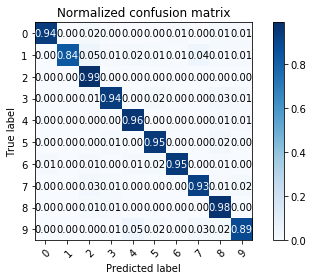

In [8]:
#plot results
# Plot normalized confusion matrix
plot_confusion_matrix(predicted, test_labels, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [27]:
print("The accuracy of the model is {}".format(accuracy_score(predicted,test_labels)))

The accuracy of the model is 0.9303
